### Only take screen shots of streamlit code instead of machine_learning model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn import metrics

In [14]:
df=pd.read_csv('/Users/apple/Desktop/Machine_Learning/week_7/IMDB_movie_reviews_train.csv')
# /Users/apple/Desktop/Machine_Learning/week_7

In [15]:
df.shape

(10000, 2)

In [16]:
df.head(5)

,review,sentiment
0,"From the beginning of this film,with it's ""The...",negative
1,1 hour and 40 minutes of talking--boring talki...,negative
2,I watched 40 minutes and couldn't bear it any ...,negative
3,Jim Carrey is back to much the same role that ...,positive
4,This is a silly spoof of private eye thrillers...,negative


In [17]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [18]:
df.sentiment.value_counts()

negative    5000
positive    5000
Name: sentiment, dtype: int64

In [19]:
X=df.loc[:,['review']]
y=df.sentiment

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [21]:
y_train.value_counts()

negative    3500
positive    3500
Name: sentiment, dtype: int64

In [22]:
X_train_docs=[doc for doc in X_train.review]

In [23]:
vect=CountVectorizer(ngram_range=(1,3),stop_words='english',max_features=1000).fit(X_train_docs)

In [24]:
X_train_features=vect.transform(X_train_docs)

In [25]:
import pickle
pickle.dump(vect,open('feature_transform','wb'))
feature_transform=pickle.load(open('feature_transform','rb'))

In [26]:
feature_transform

CountVectorizer(max_features=1000, ngram_range=(1, 3), stop_words='english')

In [35]:
print('X_train_features:\n{}'.format(repr(X_train_features)))

X_train_features:
<7000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 334197 stored elements in Compressed Sparse Row format>


In [36]:
feature_names=vect.get_feature_names()

In [37]:
print("Number of features:{}".format(len(feature_names)))
print("First 100 features:\n{}".format(feature_names[:100]))
print("Every 100th feature:\n{}".format(feature_names[::100]))

Number of features:1000
First 100 features:
['10', '100', '15', '20', '30', '50', '80', '90', 'able', 'absolutely', 'act', 'acted', 'acting', 'action', 'actor', 'actors', 'actress', 'actual', 'actually', 'adaptation', 'add', 'added', 'admit', 'adult', 'adventure', 'age', 'ago', 'agree', 'air', 'alien', 'alive', 'amazing', 'america', 'american', 'animation', 'annoying', 'anti', 'apart', 'apparently', 'appear', 'appears', 'appreciate', 'aren', 'art', 'ask', 'atmosphere', 'attempt', 'attempts', 'attention', 'audience', 'audiences', 'average', 'avoid', 'away', 'awful', 'baby', 'background', 'bad', 'bad movie', 'badly', 'band', 'based', 'basically', 'battle', 'beautiful', 'beauty', 'begin', 'beginning', 'begins', 'believable', 'believe', 'best', 'better', 'big', 'biggest', 'bit', 'bizarre', 'black', 'blood', 'body', 'book', 'bored', 'boring', 'box', 'boy', 'boys', 'br', 'br 10', 'br br', 'br br 10', 'br br film', 'br br movie', 'br br story', 'br film', 'br movie', 'br story', 'brain', 'bre

In [38]:
lin_svc=LinearSVC(max_iter=120000)

In [40]:
scores=cross_val_score(lin_svc, X_train_features, y_train, cv=5)
print("Mean cross-validation accuracy:{:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy:0.81


In [41]:
lin_svc.fit(X_train_features, y_train)

LinearSVC(max_iter=120000)

In [43]:
X_test_docs=[doc for doc in X_test.review]
X_test_features=vect.transform(X_test_docs)

In [44]:
y_test_pred=lin_svc.predict(X_test_features)

In [45]:
metrics.accuracy_score(y_test, y_test_pred)

0.8143333333333334

In [46]:
import pickle

In [47]:
pickle.dump(lin_svc,open('linear_svc_model','wb'))

In [29]:
lin_svc=pickle.load(open('linear_svc_model','rb'))
vect=pickle.load(open('feature_transform','rb'))

In [31]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt

0.5319687979198613


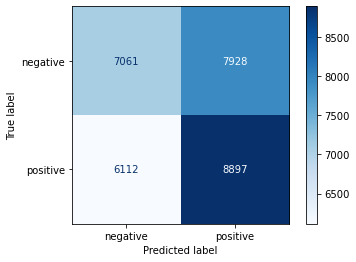

In [36]:
df = pd.read_csv('IMDB_movie_reviews_test_sample.csv')
# st.write(df)

X_test=df.loc[:,['review']]
y_test_actual=df.sentiment

X_test_docs=[doc for doc in X_test.review]
X_test_features=vect.transform(X_test_docs)

y_test_pred=lin_svc.predict(X_test_features)

print(metrics.accuracy_score(y_test_actual, y_test_pred))


confusion_matrix(y_test_actual,y_test_pred)
picture=plot_confusion_matrix(lin_svc,X_test_features,y_test_actual,cmap=plt.cm.Blues)

In [34]:
type(confusion_matrix(y_test_actual,y_test_pred))

numpy.ndarray

In [35]:
pd.DataFrame(confusion_matrix(y_test_actual,y_test_pred))

,0,1
0,7061,7928
1,6112,8897


In [39]:
df = pd.read_csv('IMDB_movie_reviews_test_sample.csv')

In [40]:
df.iloc[0:100]

,review,sentiment
0,If you like your sports movies to be about dig...,positive
1,This is a movie that plays to everyone's emoti...,positive
2,this movie is the worst EVER!!! sorry but this...,negative
3,After working on 7 movies with director Mickae...,positive
4,From the beginning this movie did have a few f...,negative
...,...,...
95,Loosely intended as a satire of D.W. Griffith'...,positive
96,The Girl in Lovers Lane is one strange little ...,negative
97,This movie was different in that it didn't sho...,negative
98,A mild-mannered NY lawyer (George Segal) is sl...,negative
